![title](MIT.png)

 #  <font color= #B30838> Travel Salesman Problem - TSP | Gurobi | V[1]. </font>

<div class="alert alert-info"> </h4> **Travel Salesman Problem desarrollado para los curso de Investigación operativa 2 y Cadena de Suminitros**
</h4> </div>

El objetivo de este material es aprender a utilizar Gurobi con python. 
<img src="logo gurobi.png" width="400" height="400" />


In [1]:
from gurobipy import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n=10
ciudades=[i for i in range(n)] # Creamos ciudades de la 0 a la 9  
arcos =[(i,j) for i in ciudades for j in ciudades if i!=j]

In [4]:
#Ahora crearemos las cordenadas para cada ciudad.
random=np.random
random.seed(1)
coord_x=random.rand(n)*100
coord_y=random.rand(n)*100
#print(" Cordenadas de X para todas las ciudades")
#print(coord_x)
#print("---------------------------------------------------------------------")
#print(" Cordenadas de y para todas las ciudades")
#print(coord_y)

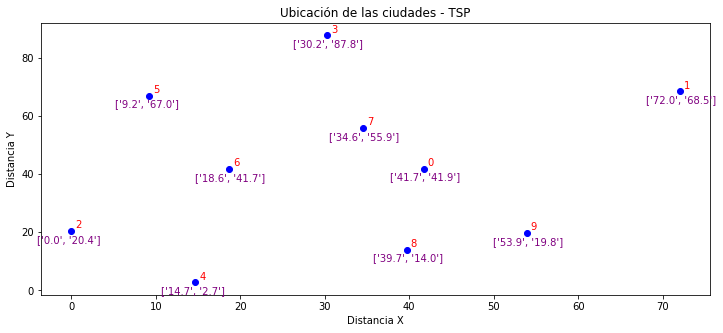

In [5]:
x=coord_x
y=coord_y

plt.figure(figsize=(12,5))
plt.scatter(x,y,color='blue')
s=[]
for n in range(len(coord_x)):
    s_temp=[]
    s_temp.append("%.1f" %coord_x[n])
    s_temp.append("%.1f" %coord_y[n])
    s.append(s_temp)

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")

for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]-4,coord_y[n]-4), 
                 color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='red')

plt.show()

In [6]:
distancia={(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i,j in arcos}

In [7]:
model = Model('Travel SalesMan Problem - Gurobi')

Academic license - for non-commercial use only


In [8]:
x = model.addVars(arcos, vtype=GRB.BINARY, name='x')
u = model.addVars(ciudades, vtype=GRB.CONTINUOUS, name='u')

In [9]:
model.setObjective(quicksum(distancia[i] * x[i] for i in arcos), GRB.MINIMIZE)

for k in ciudades:
    model.addConstr(quicksum(x[(i,j)] for i,j in arcos if i==k)==1, name='out_%d'%k)
    
for k in ciudades:
    model.addConstr(quicksum(x[(i,j)] for i,j in arcos if j==k)==1, name='in_%d'%k)

for i, j in arcos:
    #indicator constraint
    if j!=0:
        model.addConstr((x[(i, j)] == 1) >> (u[i] + 1 == u[j]), name='order_(%d,_%d)'%(i, j))
        

In [10]:
model.Params.timeLimit = 60
model.Params.MIPGap = 0.2
model.optimize()

Changed value of parameter timeLimit to 60.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter MIPGap to 0.2
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 20 rows, 100 columns and 180 nonzeros
Model has 81 general constraints
Variable types: 10 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve added 81 rows and 81 columns
Presolve time: 0.02s
Presolved: 101 rows, 181 columns, 387 nonzeros
Presolved model has 81 SOS constraint(s)
Variable types: 91 continuous, 90 integer (90 binary)

Root relaxation: objective 2.540685e+02, 16 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  254.06854    0    9          -  254.06854      -     -    

In [11]:
model.Status

2

In [12]:
#model.getVars()

In [13]:
model.SolCount

2

In [14]:
model.ObjVal

277.0761938420476

In [15]:
arcos_activos = [i for i in arcos if x[i].x > 0.9]
arcos_activos

[(0, 7),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 8),
 (5, 6),
 (6, 2),
 (7, 1),
 (8, 9),
 (9, 0)]

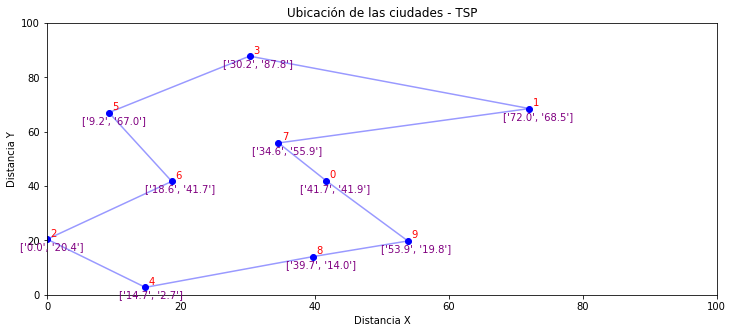

In [16]:
#Imprimiento la solución óptima.

plt.figure(figsize=(12,5))
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")

for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='blue', zorder=1)
    
for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]-4,coord_y[n]-4), color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]+0.5,coord_y[n]+1),color='red')
    
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()